# Produce visualizations
## Group 2


In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import download
import descriptives as dcts

In [24]:
eviction = download.load_evict('../inputs/eviction_data_tract.csv')
crime = download.load_crime('../inputs/crime_by_tract.csv')
buildings = download.load_building('../inputs/building_violation_by_tract.csv')
acs = download.load_acs('../inputs/acs_year_tract.csv')
education = download.load_education('../inputs/educ_year_tract.csv')
tracts = download.load_tract('../inputs/ch_opdat/tracts.csv', True)

In [39]:
tracts = download.convert_to_geopandas(tracts, 'location')
type(tracts)

geopandas.geodataframe.GeoDataFrame

In [42]:
eviction_df = download.join_bases(eviction, acs, education, crime, buildings, tracts)
type(eviction_df)

geopandas.geodataframe.GeoDataFrame

In [44]:
eviction_df.columns

Index(['tract', 'commarea', 'location', 'geometry', 'filing_year',
       'eviction_filings_total', 'eviction_filings_rate',
       'eviction_filings_completed', 'case_type_single_action',
       'case_type_joint_action',
       ...
       'total_department_bureau_SIGNS_mean_by_commarea',
       'total_department_bureau_SPECIAL INSPECTION PROGRAM_mean_by_commarea',
       'total_department_bureau_SPECIAL TASK FORCE_mean_by_commarea',
       'total_department_bureau_VENTILATION_mean_by_commarea',
       'total_department_bureau_WATER_mean_by_commarea',
       'total_violation_status_COMPLIED_perc_mean_by_commarea',
       'total_violation_status_NO ENTRY_perc_mean_by_commarea',
       'total_violation_status_OPEN_perc_mean_by_commarea',
       'total_inspection_category_COMPLAINT_perc_mean_by_commarea',
       'perc_increase_bv_mean_by_commarea'],
      dtype='object', length=286)

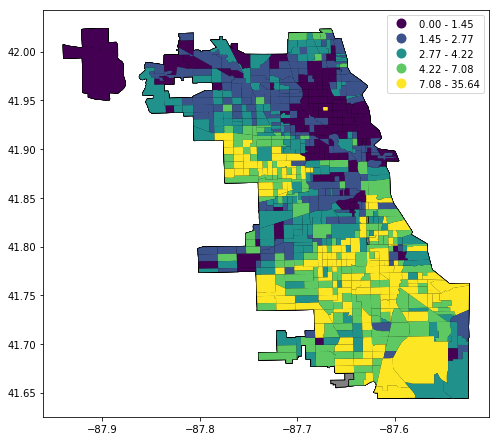

In [57]:
fig, ax = plt.subplots(figsize=(8, 12))
eviction_df.plot(color="grey", ax=ax, edgecolor="black")
eviction_df[eviction_df['year'] == 2014].plot(ax=ax, column='eviction_filings_rate',
                                              cmap='viridis', 
                                              scheme='quantiles',
                                              legend=True)

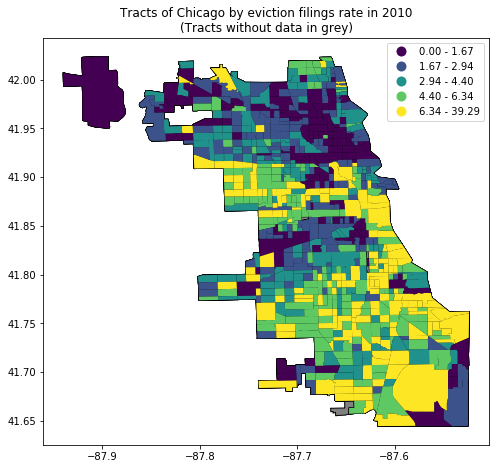

In [65]:
dcts.plot_map(eviction_df, 'eviction_filings_rate', 2010)

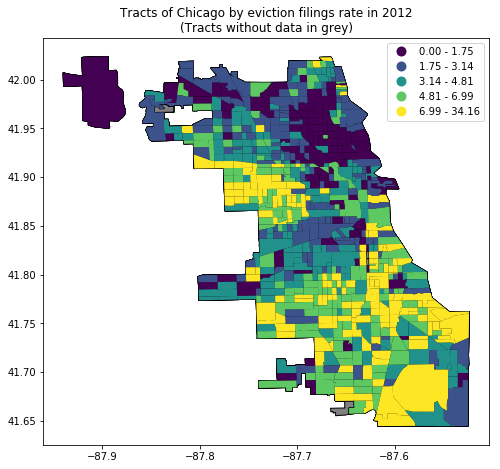

In [66]:
dcts.plot_map(eviction_df, 'eviction_filings_rate', 2012)